In [15]:
#! pip install pandas numpy matplotlib

In [26]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [27]:
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

In [28]:
# Read config
config = read_json_file('config.json')

In [29]:


# Load data
constraints_df = pd.read_csv(config['constraints']['file'])
results_df = pd.read_csv(config['validate']['file'],low_memory=False)


You should consider using `low_memory=False` in the following scenarios:

- **Mixed Data Types**: If your CSV file has columns with mixed data types (e.g., a column that contains both integers and strings), setting `low_memory=False` can help pandas infer the correct data types.


In [30]:
results_df.head()


,area_id,s01_hh_urban_rural%rural,s01_hh_urban_rural%urban,s02_hh_size%hhsize_1,s02_hh_size%hhsize_2,s02_hh_size%hhsize_3,s02_hh_size%hhsize_4,s02_hh_size%hhsize_5,s02_hh_size%hhsize_6,s02_hh_size%hhsize_7,...,s13_unpaid_carer_hh_size%carer_0_hh_size_3,s13_unpaid_carer_hh_size%carer_1_hh_size_1_2,s13_unpaid_carer_hh_size%carer_1_hh_size_3,s13_unpaid_carer_hh_size%carer_2_hh_size_1_2,s13_unpaid_carer_hh_size%carer_2_hh_size_3,s14_edu_count_no_qualification,s14_edu_count_lower_school,s14_edu_count_upper_further,s14_edu_count_degree_level,s14_edu_count_other
0,S00135308,33,0,9,17,3,3,1,0,0,...,5,4,2,0,0,6,8,8,25,8
1,S00135332,0,47,21,15,5,5,1,0,0,...,9,5,2,0,0,11,19,15,17,8
2,S00135331,0,31,10,11,6,4,0,0,0,...,6,3,3,0,1,12,13,10,12,5
3,S00135326,0,55,34,13,5,2,1,0,0,...,5,5,2,0,1,21,10,15,18,6
4,S00135327,0,43,13,15,7,6,2,0,0,...,12,3,1,0,2,16,18,20,19,2


In [31]:
constraints_df.head()


,geography_code,population_total,s01_hh_urban_rural%rural,s01_hh_urban_rural%urban,s02_hh_size%hhsize_1,s02_hh_size%hhsize_2,s02_hh_size%hhsize_3,s02_hh_size%hhsize_4,s02_hh_size%hhsize_5,s02_hh_size%hhsize_6,...,s13_unpaid_carer_hh_size%carer_0_hh_size_3,s13_unpaid_carer_hh_size%carer_1_hh_size_1_2,s13_unpaid_carer_hh_size%carer_1_hh_size_3,s13_unpaid_carer_hh_size%carer_2_hh_size_1_2,s13_unpaid_carer_hh_size%carer_2_hh_size_3,s14_edu_count_no_qualification,s14_edu_count_lower_school,s14_edu_count_upper_further,s14_edu_count_degree_level,s14_edu_count_other
0,S00135307,62,62,0,21,23,8,5,4,0,...,10,6,1,1,3,13,24,27,44,10
1,S00135308,33,33,0,9,17,2,3,1,0,...,4,4,1,1,1,7,8,7,24,8
2,S00135309,71,71,0,26,30,7,4,2,1,...,11,5,1,0,3,27,21,18,64,15
3,S00135310,65,0,65,22,24,11,6,1,0,...,17,4,5,2,2,11,39,40,31,15
4,S00135311,64,64,0,16,20,14,11,2,1,...,23,9,2,0,1,12,17,27,52,9


In [32]:
results_headings = results_df.columns.tolist()[1:]
constraints_headings = constraints_df.columns.tolist()[2:]

In [34]:
results_headings

['s01_hh_urban_rural%rural',
 's01_hh_urban_rural%urban',
 's02_hh_size%hhsize_1',
 's02_hh_size%hhsize_2',
 's02_hh_size%hhsize_3',
 's02_hh_size%hhsize_4',
 's02_hh_size%hhsize_5',
 's02_hh_size%hhsize_6',
 's02_hh_size%hhsize_7',
 's02_hh_size%hhsize_8',
 's03_hh_tenure_child%owned_mortgage_00_04',
 's03_hh_tenure_child%owned_mortgage_05_11',
 's03_hh_tenure_child%owned_mortgage_12_18',
 's03_hh_tenure_child%owned_mortgage_no_children',
 's03_hh_tenure_child%owned_outright_00_04',
 's03_hh_tenure_child%owned_outright_05_11',
 's03_hh_tenure_child%owned_outright_12_18',
 's03_hh_tenure_child%owned_outright_no_children',
 's03_hh_tenure_child%private_rented_00_04',
 's03_hh_tenure_child%private_rented_05_11',
 's03_hh_tenure_child%private_rented_12_18',
 's03_hh_tenure_child%private_rented_no_children',
 's03_hh_tenure_child%social_rented_00_04',
 's03_hh_tenure_child%social_rented_05_11',
 's03_hh_tenure_child%social_rented_12_18',
 's03_hh_tenure_child%social_rented_no_children',
 '

In [24]:
def compare_proportions_single_plot(constraints_df, results_df, proportion_columns, 
                                  constraints_id='geography_code', results_id='syntpop',
                                  population_col='population_total'):
    """
    Compare proportions between constraints and synthetic population data on a single plot
    
    Parameters:
    - constraints_df: DataFrame with ground truth/constraint data
    - results_df: DataFrame with synthetic population results
    - proportion_columns: List of column names to compare (e.g., ['s1_hh_urban_rural%urban', ...])
    - constraints_id: Column name for geography IDs in constraints_df
    - results_id: Column name for geography IDs in results_df
    - population_col: Column name for population totals
    """
    
    # Validate input columns
    missing_in_constraints = [col for col in proportion_columns if col not in constraints_df]
    missing_in_results = [col for col in proportion_columns if col not in results_df]
    
    if missing_in_constraints:
        raise ValueError(f"Columns missing in constraints_df: {missing_in_constraints}")
    if missing_in_results:
        raise ValueError(f"Columns missing in results_df: {missing_in_results}")
    
    # Merge data
    merged = pd.merge(
        constraints_df[[constraints_id, population_col] + proportion_columns],
        results_df[[results_id] + proportion_columns],
        left_on=constraints_id,
        right_on=results_id,
        suffixes=('_constraints', '_results')
    )
    
    if len(merged) == 0:
        raise ValueError("No matching geographies found between the dataframes")
    
    # Calculate proportions
    for col in proportion_columns:
        merged[f'{col}_constraints_prop'] = merged[f'{col}_constraints'] / merged[population_col]
        merged[f'{col}_results_prop'] = merged[f'{col}_results'] / merged[population_col]
    
    # Create single plot
    plt.figure(figsize=(8, 6))
    
    # Color palette for different categories
    colors = plt.cm.tab10.colors  # Using matplotlib's default color cycle
    
    # Plot each proportion column
    for i, col in enumerate(proportion_columns):
        col_name = col.split('%')[-1]
        color = colors[i % len(colors)]
        
        plt.scatter(
            merged[f'{col}_constraints_prop'],
            merged[f'{col}_results_prop'],
            alpha=0.7,
            color=color,
            label=col_name
        )
        
        # Calculate metrics for this column
        corr = merged[f'{col}_constraints_prop'].corr(merged[f'{col}_results_prop'])
        mae = abs(merged[f'{col}_constraints_prop'] - merged[f'{col}_results_prop']).mean()
        
        # Add metrics to legend
        plt.scatter([], [], color=color, 
                   label=f"{col_name} (r={corr:.2f}, MAE={mae:.4f})")
    
    # Reference line
    max_val = max(
        max(merged[f'{col}_constraints_prop'].max() for col in proportion_columns),
        max(merged[f'{col}_results_prop'].max() for col in proportion_columns)
    ) * 1.1
    
    plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Perfect agreement')
    
    # Format plot
    plt.xlabel('Constraints Proportion')
    plt.ylabel('Synthetic Population Proportion')
    plt.title(f'Proportion Comparison (n={len(merged)} geographies)')
    plt.xlim(0, max_val)
    plt.ylim(0, max_val)
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Position legend outside the plot if many categories
    n_cols = 1 if len(proportion_columns) <= 3 else 2
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=n_cols)
    
    plt.tight_layout()
    
    # Print summary statistics
    print(f"\nValidation Metrics (n={len(merged)} matched geographies):")
    for col in proportion_columns:
        col_name = col.split('%')[-1]
        corr = merged[f'{col}_constraints_prop'].corr(merged[f'{col}_results_prop'])
        mae = abs(merged[f'{col}_constraints_prop'] - merged[f'{col}_results_prop']).mean()
        print(f"\n{col_name.title()} Proportion:")
        print(f"  Correlation: {corr:.3f}")
        print(f"  Mean Absolute Error: {mae:.4f}")
    
    return plt.gcf(), merged

# # Example usage:
# fig, merged_results = compare_proportions_single_plot(
#     constraints_df,
#     results_df,
#     proportion_columns=['s1_hh_urban_rural%urban', 's1_hh_urban_rural%rural']
# )
# plt.show()

In [25]:
headers = list(constraints_df.columns)
all_columns=[]
for h in headers:
    all_columns.append(h)


In [27]:
all_columns[2:]

['s1_hh_urban_rural%urban',
 's1_hh_urban_rural%rural',
 's2_hh_size%hhsize_1',
 's2_hh_size%hhsize_2',
 's2_hh_size%hhsize_3',
 's2_hh_size%hhsize_4',
 's2_hh_size%hhsize_5',
 's2_hh_size%hhsize_6',
 's2_hh_size%hhsize_7',
 's2_hh_size%hhsize_8',
 's3_hh_tenure_child%owned_outright_no_children',
 's3_hh_tenure_child%owned_outright_00_04',
 's3_hh_tenure_child%owned_outright_05_11',
 's3_hh_tenure_child%owned_outright_12_18',
 's3_hh_tenure_child%owned_mortgage_no_children',
 's3_hh_tenure_child%owned_mortgage_00_04',
 's3_hh_tenure_child%owned_mortgage_05_11',
 's3_hh_tenure_child%owned_mortgage_12_18',
 's3_hh_tenure_child%private_rented_no_children',
 's3_hh_tenure_child%private_rented_00_04',
 's3_hh_tenure_child%private_rented_05_11',
 's3_hh_tenure_child%private_rented_12_18',
 's3_hh_tenure_child%social_rented_no_children',
 's3_hh_tenure_child%social_rented_00_04',
 's3_hh_tenure_child%social_rented_05_11',
 's3_hh_tenure_child%social_rented_12_18',
 's4_hh_ncars_hh_size%hhcars

In [28]:
# Create a dictionary to group columns by their prefix
grouped_columns = defaultdict(list)

for column in all_columns[2:]:
    # Extract the prefix (e.g., 's1', 's2', etc.)
    prefix = column.split('_')[0]  # Splits on first underscore
    grouped_columns[prefix].append(column)

# Convert to a regular dictionary and sort by key
grouped_columns = dict(sorted(grouped_columns.items()))




In [29]:
grouped_columns['s1']

['s1_hh_urban_rural%urban', 's1_hh_urban_rural%rural']

In [30]:
def plot_comparison(group_id):
    fig, merged_results = compare_proportions_single_plot(
        constraints_df,
        results_df,
        proportion_columns=grouped_columns[group_id]
    )
    plt.title(group_id)
    plt.savefig(group_id+'.png', dpi=300)
    plt.show()
    


Validation Metrics (n=46363 matched geographies):

Urban Proportion:
  Correlation: 1.000
  Mean Absolute Error: 0.0000

Rural Proportion:
  Correlation: 1.000
  Mean Absolute Error: 0.0000


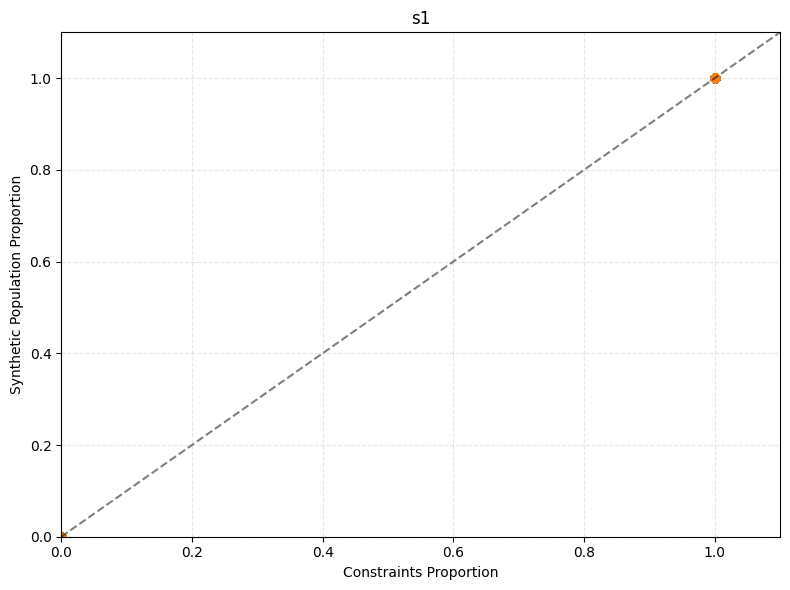


Validation Metrics (n=46363 matched geographies):

Hhsize_1 Proportion:
  Correlation: 0.991
  Mean Absolute Error: 0.0184

Hhsize_2 Proportion:
  Correlation: 0.976
  Mean Absolute Error: 0.0158

Hhsize_3 Proportion:
  Correlation: 0.956
  Mean Absolute Error: 0.0148

Hhsize_4 Proportion:
  Correlation: 0.967
  Mean Absolute Error: 0.0144

Hhsize_5 Proportion:
  Correlation: 0.897
  Mean Absolute Error: 0.0091

Hhsize_6 Proportion:
  Correlation: 0.709
  Mean Absolute Error: 0.0076

Hhsize_7 Proportion:
  Correlation: 0.428
  Mean Absolute Error: 0.0096

Hhsize_8 Proportion:
  Correlation: 0.315
  Mean Absolute Error: 0.0102


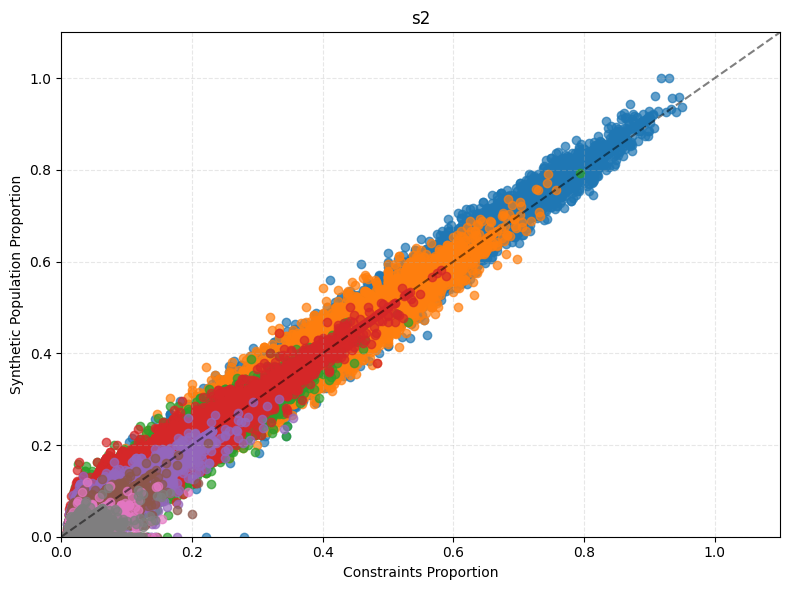


Validation Metrics (n=46363 matched geographies):

Owned_Outright_No_Children Proportion:
  Correlation: 0.995
  Mean Absolute Error: 0.0125

Owned_Outright_00_04 Proportion:
  Correlation: 0.607
  Mean Absolute Error: 0.0076

Owned_Outright_05_11 Proportion:
  Correlation: 0.674
  Mean Absolute Error: 0.0078

Owned_Outright_12_18 Proportion:
  Correlation: 0.771
  Mean Absolute Error: 0.0072

Owned_Mortgage_No_Children Proportion:
  Correlation: 0.982
  Mean Absolute Error: 0.0137

Owned_Mortgage_00_04 Proportion:
  Correlation: 0.949
  Mean Absolute Error: 0.0101

Owned_Mortgage_05_11 Proportion:
  Correlation: 0.949
  Mean Absolute Error: 0.0097

Owned_Mortgage_12_18 Proportion:
  Correlation: 0.923
  Mean Absolute Error: 0.0087

Private_Rented_No_Children Proportion:
  Correlation: 0.991
  Mean Absolute Error: 0.0116

Private_Rented_00_04 Proportion:
  Correlation: 0.815
  Mean Absolute Error: 0.0071

Private_Rented_05_11 Proportion:
  Correlation: 0.796
  Mean Absolute Error: 0.0

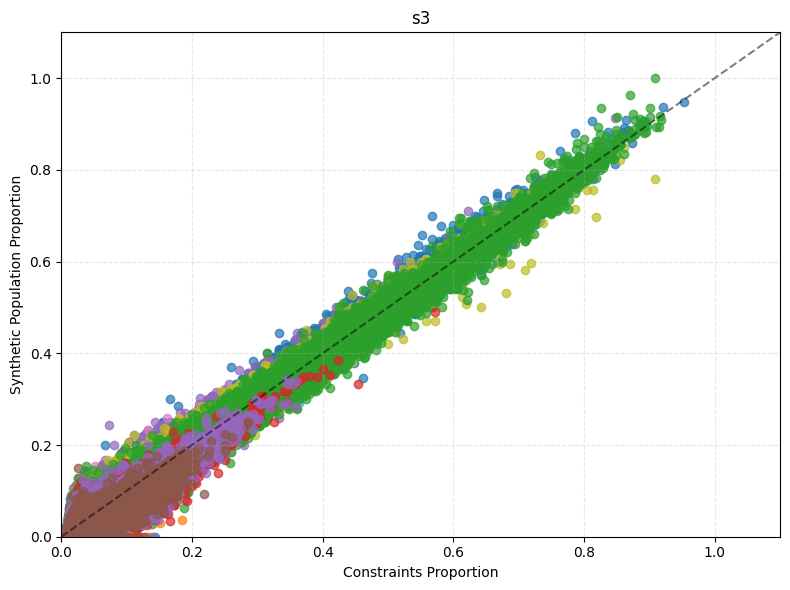


Validation Metrics (n=46363 matched geographies):

Hhcars_0_Hh_Size_1 Proportion:
  Correlation: 0.992
  Mean Absolute Error: 0.0125

Hhcars_0_Hh_Size_2 Proportion:
  Correlation: 0.955
  Mean Absolute Error: 0.0099

Hhcars_0_Hh_Size_3 Proportion:
  Correlation: 0.825
  Mean Absolute Error: 0.0091

Hhcars_0_Hh_Size_4 Proportion:
  Correlation: 0.779
  Mean Absolute Error: 0.0092

Hhcars_1_Hh_Size_1 Proportion:
  Correlation: 0.974
  Mean Absolute Error: 0.0144

Hhcars_1_Hh_Size_2 Proportion:
  Correlation: 0.968
  Mean Absolute Error: 0.0117

Hhcars_1_Hh_Size_3 Proportion:
  Correlation: 0.889
  Mean Absolute Error: 0.0126

Hhcars_1_Hh_Size_4 Proportion:
  Correlation: 0.911
  Mean Absolute Error: 0.0107

Hhcars_2_Hh_Size_1 Proportion:
  Correlation: 0.847
  Mean Absolute Error: 0.0056

Hhcars_2_Hh_Size_2 Proportion:
  Correlation: 0.980
  Mean Absolute Error: 0.0103

Hhcars_2_Hh_Size_3 Proportion:
  Correlation: 0.913
  Mean Absolute Error: 0.0116

Hhcars_2_Hh_Size_4 Proportion:
  Co

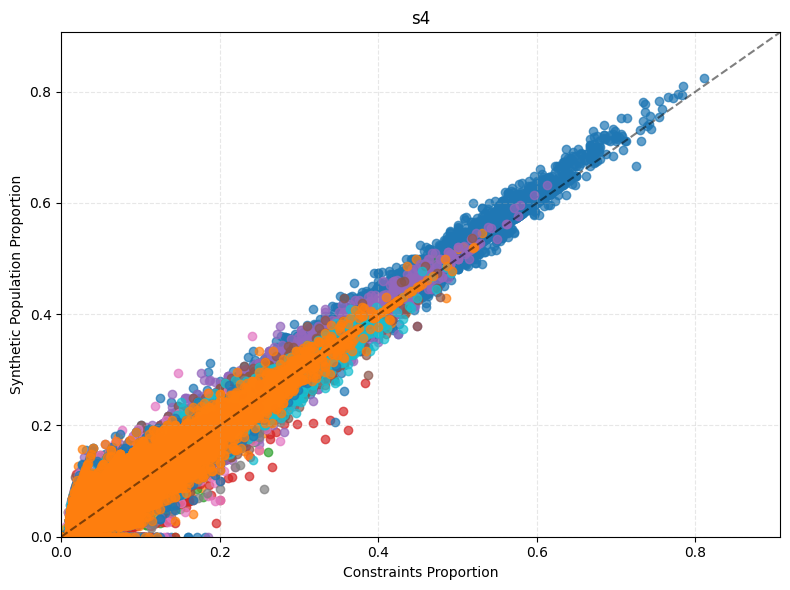


Validation Metrics (n=46363 matched geographies):

Hhbeds_1 Proportion:
  Correlation: 0.997
  Mean Absolute Error: 0.0076

Hhbeds_2 Proportion:
  Correlation: 0.998
  Mean Absolute Error: 0.0085

Hhbeds_3 Proportion:
  Correlation: 0.998
  Mean Absolute Error: 0.0080

Hhbeds_4 Proportion:
  Correlation: 0.996
  Mean Absolute Error: 0.0084

Hhbeds_5 Proportion:
  Correlation: 0.981
  Mean Absolute Error: 0.0067


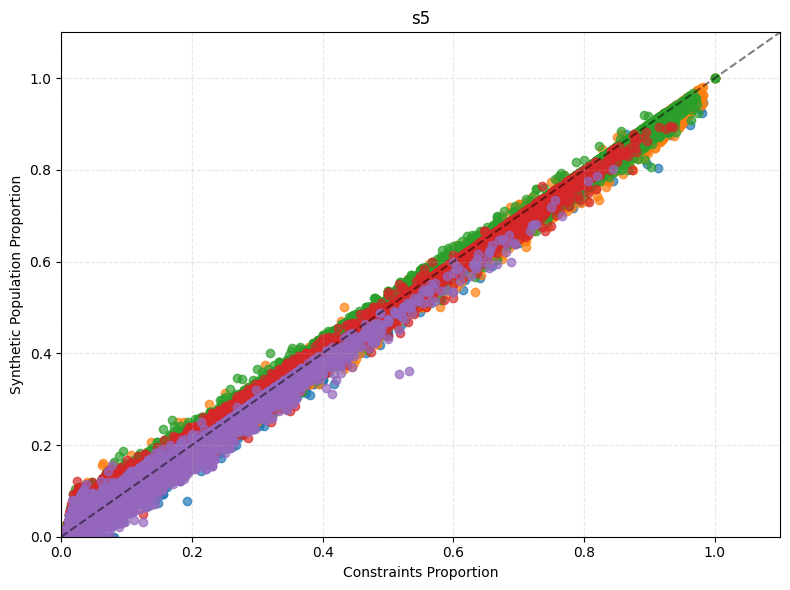


Validation Metrics (n=46363 matched geographies):

Without_Heating Proportion:
  Correlation: 0.960
  Mean Absolute Error: 0.0057

With_Heating Proportion:
  Correlation: 0.960
  Mean Absolute Error: 0.0057


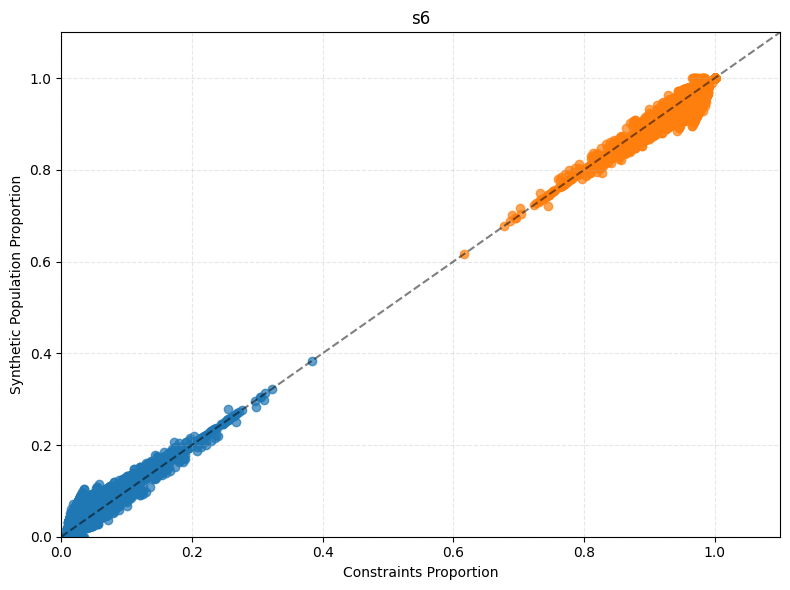


Validation Metrics (n=46363 matched geographies):

One_Person_Pensionable_No_Children Proportion:
  Correlation: 0.982
  Mean Absolute Error: 0.0137

One_Person_Not_Pensionable_No_Children Proportion:
  Correlation: 0.991
  Mean Absolute Error: 0.0137

Lone_Parent_One_Child Proportion:
  Correlation: 0.895
  Mean Absolute Error: 0.0107

Lone_Parent_Two_Or_More_Children Proportion:
  Correlation: 0.852
  Mean Absolute Error: 0.0385

Couple_Married_Civil_No_Children Proportion:
  Correlation: 0.961
  Mean Absolute Error: 0.0385

Couple_Married_Civil_One_Or_More_Children Proportion:
  Correlation: 0.982
  Mean Absolute Error: 0.0197

Other Proportion:
  Correlation: 0.965
  Mean Absolute Error: 0.0186


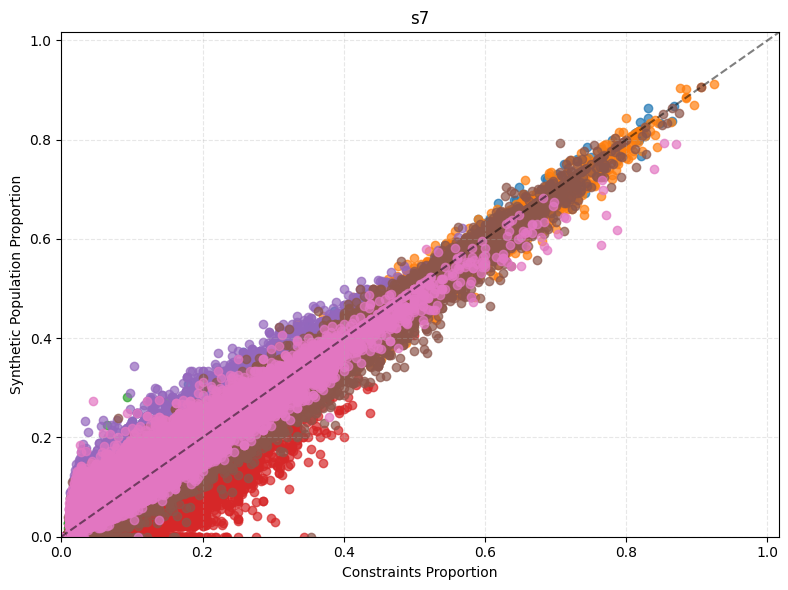


Validation Metrics (n=46363 matched geographies):

Self_Employed Proportion:
  Correlation: 0.970
  Mean Absolute Error: 0.0102

In_Paid_Employment Proportion:
  Correlation: 0.990
  Mean Absolute Error: 0.0195

Unemployed Proportion:
  Correlation: 0.888
  Mean Absolute Error: 0.0074

Retired Proportion:
  Correlation: 0.994
  Mean Absolute Error: 0.0101

Looking_After_Home Proportion:
  Correlation: 0.874
  Mean Absolute Error: 0.0090

Student Proportion:
  Correlation: 0.903
  Mean Absolute Error: 0.0094

Long_Term_Sick_Disabled Proportion:
  Correlation: 0.975
  Mean Absolute Error: 0.0082

Other Proportion:
  Correlation: 0.835
  Mean Absolute Error: 0.0091


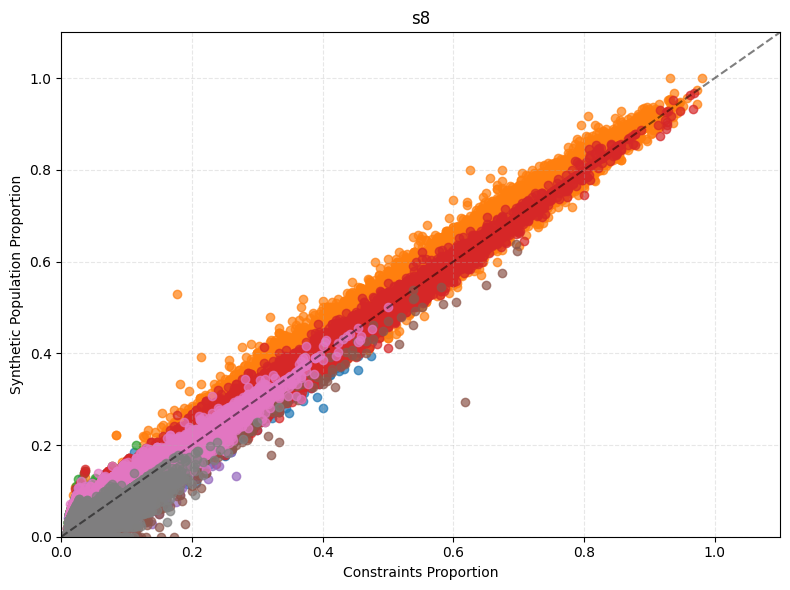


Validation Metrics (n=46363 matched geographies):

Hhref_Male_Hhsize_1 Proportion:
  Correlation: 0.988
  Mean Absolute Error: 0.0108

Hhref_Male_Hhsize_2 Proportion:
  Correlation: 0.981
  Mean Absolute Error: 0.0143

Hhref_Male_Hhsize_3 Proportion:
  Correlation: 0.932
  Mean Absolute Error: 0.0152

Hhref_Male_Hhsize_4 Proportion:
  Correlation: 0.969
  Mean Absolute Error: 0.0141

Hhref_Female_Hhsize_1 Proportion:
  Correlation: 0.983
  Mean Absolute Error: 0.0112

Hhref_Female_Hhsize_2 Proportion:
  Correlation: 0.956
  Mean Absolute Error: 0.0127

Hhref_Female_Hhsize_3 Proportion:
  Correlation: 0.919
  Mean Absolute Error: 0.0132

Hhref_Female_Hhsize_4 Proportion:
  Correlation: 0.919
  Mean Absolute Error: 0.0123


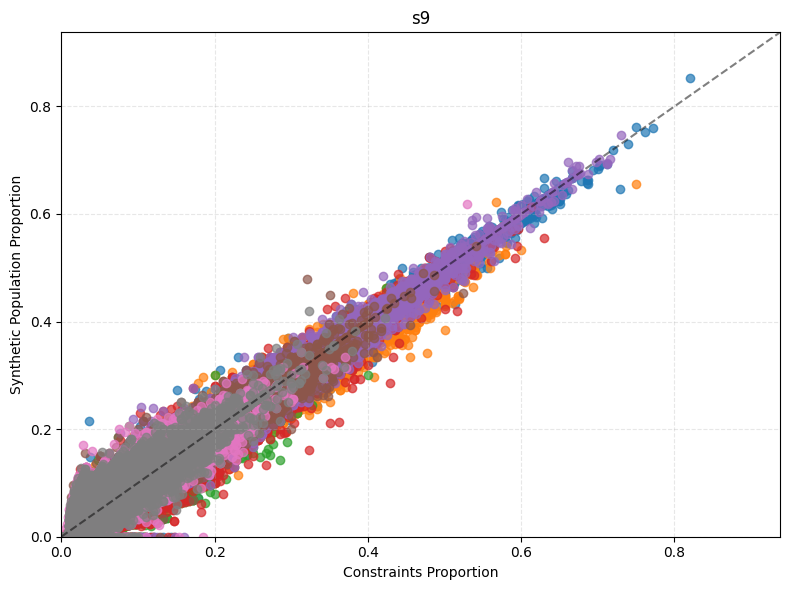


Validation Metrics (n=46363 matched geographies):

White Proportion:
  Correlation: 0.971
  Mean Absolute Error: 0.0102

Mixed Proportion:
  Correlation: 0.848
  Mean Absolute Error: 0.0040

Asian Proportion:
  Correlation: 0.966
  Mean Absolute Error: 0.0065

Black_African_Caribbean Proportion:
  Correlation: 0.911
  Mean Absolute Error: 0.0050

Other Proportion:
  Correlation: 0.738
  Mean Absolute Error: 0.0083


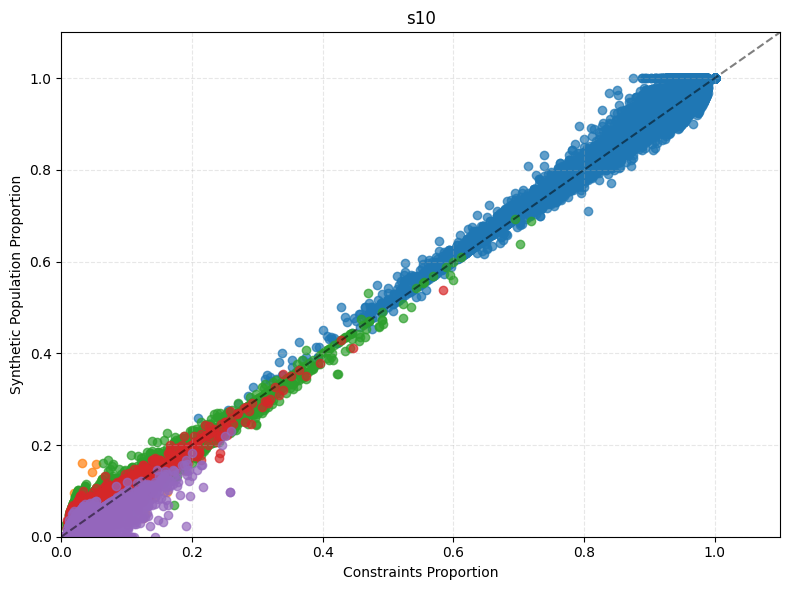


Validation Metrics (n=46363 matched geographies):

Age_Under_35_Hhsize_1_No_Child Proportion:
  Correlation: 0.979
  Mean Absolute Error: 0.0087

Age_Under_35_Hhsize_2P_No_Child Proportion:
  Correlation: 0.979
  Mean Absolute Error: 0.0094

Age_Under_35_Hhsize_2P_With_Child Proportion:
  Correlation: 0.934
  Mean Absolute Error: 0.0117

Age_35_54_Hhsize_1_No_Child Proportion:
  Correlation: 0.974
  Mean Absolute Error: 0.0107

Age_35_54_Hhsize_2P_No_Child Proportion:
  Correlation: 0.942
  Mean Absolute Error: 0.0113

Age_35_54_Hhsize_2P_With_Child Proportion:
  Correlation: 0.977
  Mean Absolute Error: 0.0188

Age_55_64_Hhsize_1_No_Child Proportion:
  Correlation: 0.960
  Mean Absolute Error: 0.0102

Age_55_64_Hhsize_2P_No_Child Proportion:
  Correlation: 0.973
  Mean Absolute Error: 0.0114

Age_55_64_Hhsize_2P_With_Child Proportion:
  Correlation: 0.798
  Mean Absolute Error: 0.0085

Age_65_74_Hhsize_1_No_Child Proportion:
  Correlation: 0.947
  Mean Absolute Error: 0.0089

Age_65_

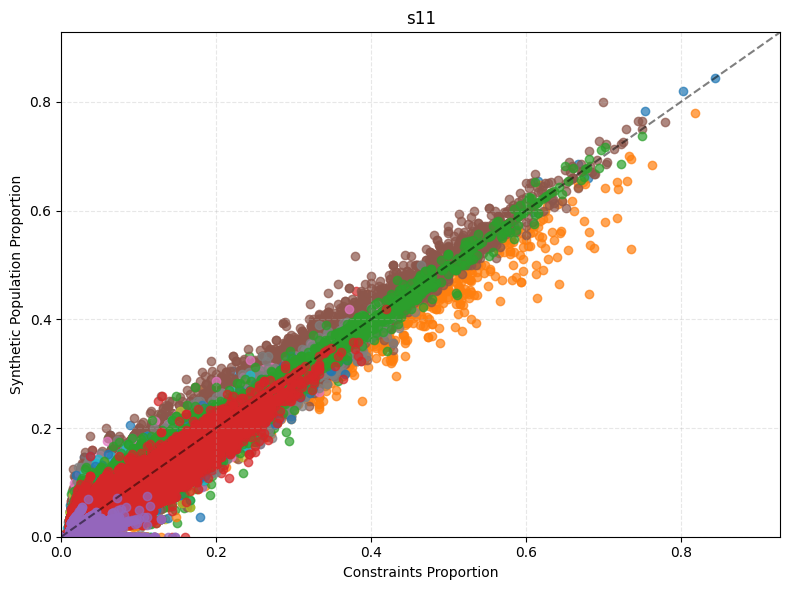


Validation Metrics (n=46363 matched geographies):

Employed_0_Hh_Size_1 Proportion:
  Correlation: 0.984
  Mean Absolute Error: 0.0184

Employed_1_Hh_Size_1 Proportion:
  Correlation: 0.980
  Mean Absolute Error: 0.0143

Employed_0_Hh_Size_2 Proportion:
  Correlation: 0.968
  Mean Absolute Error: 0.0170

Employed_1_Hh_Size_2 Proportion:
  Correlation: 0.935
  Mean Absolute Error: 0.0130

Employed_2_Hh_Size_2 Proportion:
  Correlation: 0.961
  Mean Absolute Error: 0.0195

Employed_0_Hh_Size_3 Proportion:
  Correlation: 0.803
  Mean Absolute Error: 0.0096

Employed_1_Hh_Size_3 Proportion:
  Correlation: 0.867
  Mean Absolute Error: 0.0134

Employed_2_Hh_Size_3 Proportion:
  Correlation: 0.914
  Mean Absolute Error: 0.0136

Employed_3_Hh_Size_3 Proportion:
  Correlation: 0.704
  Mean Absolute Error: 0.0185

Employed_0_Hh_Size_4 Proportion:
  Correlation: 0.798
  Mean Absolute Error: 0.0083

Employed_1_Hh_Size_4 Proportion:
  Correlation: 0.880
  Mean Absolute Error: 0.0107

Employed_2_Hh

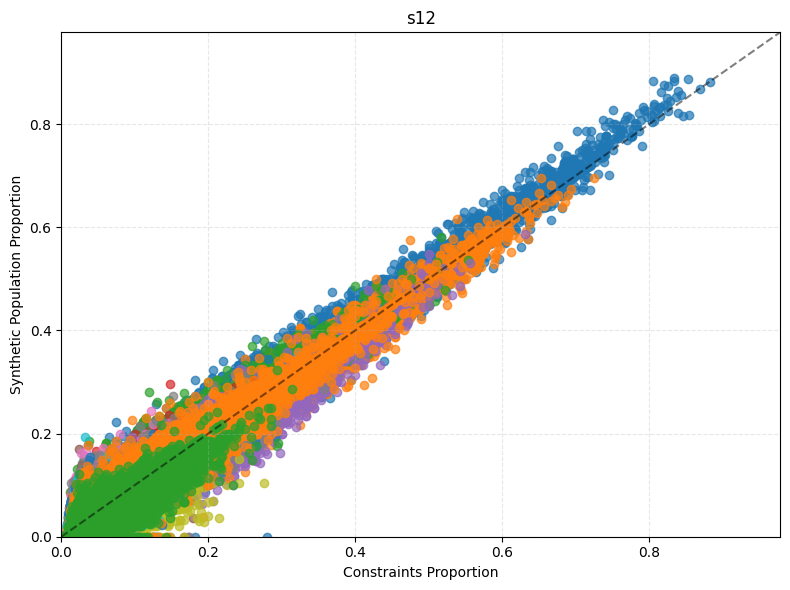


Validation Metrics (n=46363 matched geographies):

Carer_0_Hh_Size_1_2 Proportion:
  Correlation: 0.993
  Mean Absolute Error: 0.0110

Carer_0_Hh_Size_3 Proportion:
  Correlation: 0.985
  Mean Absolute Error: 0.0147

Carer_1_Hh_Size_1_2 Proportion:
  Correlation: 0.953
  Mean Absolute Error: 0.0106

Carer_1_Hh_Size_3 Proportion:
  Correlation: 0.926
  Mean Absolute Error: 0.0107

Carer_2_Hh_Size_1_2 Proportion:
  Correlation: 0.806
  Mean Absolute Error: 0.0091

Carer_2_Hh_Size_3 Proportion:
  Correlation: 0.865
  Mean Absolute Error: 0.0101


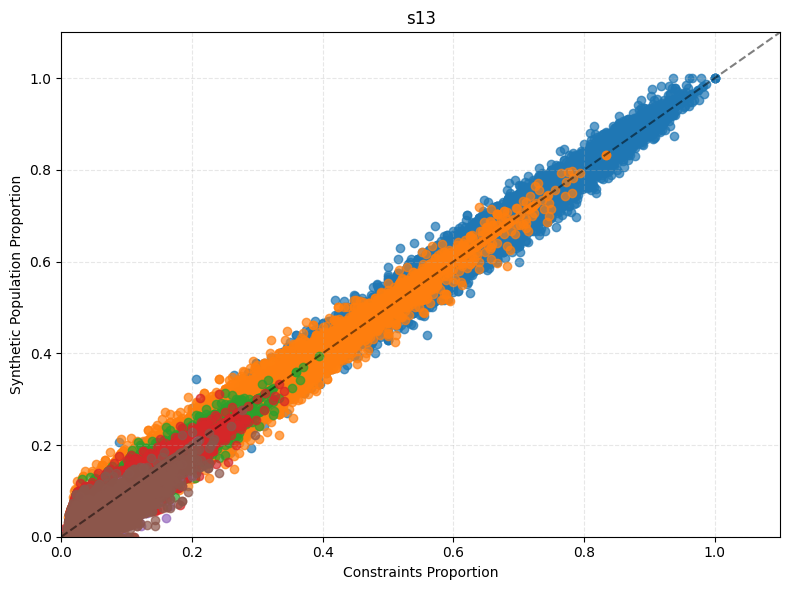

In [31]:
plot_comparison('s1')
plot_comparison('s2')
plot_comparison('s3')
plot_comparison('s4')
plot_comparison('s5')
plot_comparison('s6')
plot_comparison('s7')
plot_comparison('s8')
plot_comparison('s9')
plot_comparison('s10')
plot_comparison('s11')
plot_comparison('s12')
plot_comparison('s13')
